# 월간 신용카드 사기 거래를 탐지하는 AI 만들기
# 
###### 이하 내용의 데이터 및 대회 시스템 출처는 국내 데이터 경진 대회 플랫폼 "DACON" 을 참고로 함(대회 동의사항 A. 교육에 활용될 수 있음 조항)
###### https://dacon.io/competitions/official/235930/overview/agreement

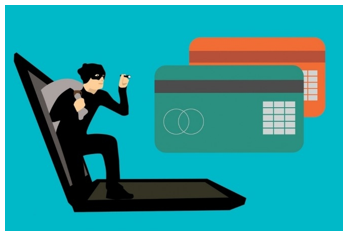
###### 이미지 출처 : https://cmobile.g-enews.com/article/Finance/2020/02/202002061516286234a218188523_1?md=20200206151744_V

## 
## 개요
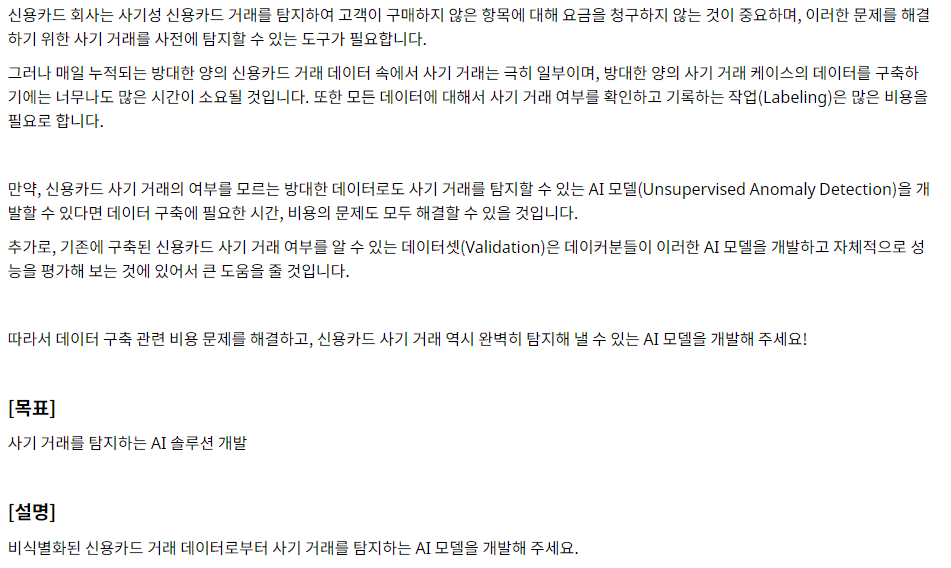

# 
## 신용카드 거래 데이터셋 소개와 평가 방법

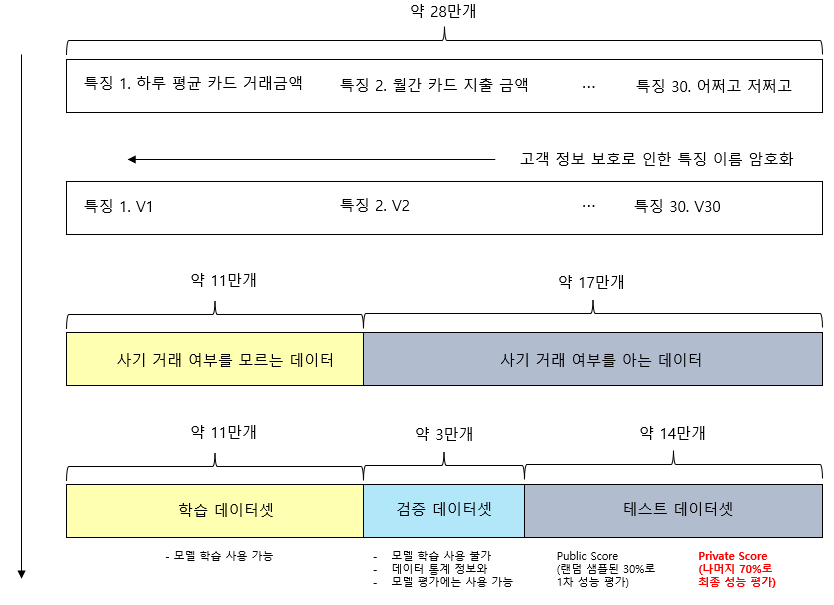

## 상세내용 :
### - 해당 신용카드사는 30개의 특징을 가지는 데이터를 약 28만개 보유 중.
### - 예) 특징1. 고객당 하루 평균 카드 거래금액,  특징2. 고객당 월간 카드 지출 금액 등
### - 하지만, 신용카드사는 고객의 정보를 법적으로 보호하고자 이런 특징을 AI 엔지니어들에게 얘기해주지 못하며 V1, V2 등으로 특징의 간이 이름을 부여하여 데이터셋을 제공함.
## 
### - 신용카드 거래 데이터의 큰 특징으로 
### 1. 대부분의 거래 데이터는 정상 거래 데이터들임(사기 거래 데이터가 극히 적음). (데이터 불균형)
### 2. 정상인지 사기인지 정답을 아는 데이터셋을 구축하기 어려움.
### - 이에 신용카드사는
### 1. 사기 거래 여부를 모르는 데이터 약 11만개를 모델 학습에 사용하라고 제공함.
### 2. 사기 거래 여부를 아는 데이터 중 약 3만개(검증 데이터셋)으로 모델 평가에 간접적으로 사용 가능.
### 3. 나머지 약 14만개(테스트 데이터셋) 중에 대회 기간 중 자신의 AI 모델이 잘하는지 평가하기 위해 30%만 가지고 1차 성능을 평가함(Public Score).
### 4. 테스트 데이터셋 중 나머지 70%을 가지고 최종 모델 성능을 평가함(Private Score).

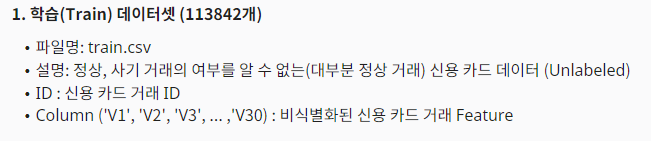

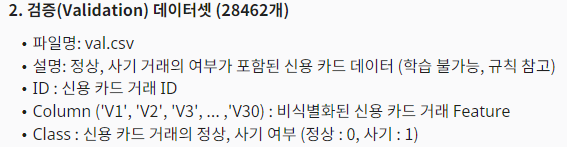

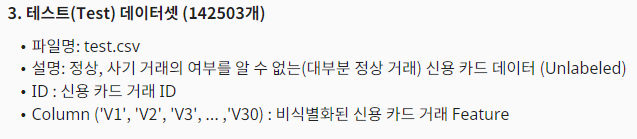

## 조건
### 1. 학습 데이터셋만 모델 학습에 사용 가능
### 2. 검증 데이터셋은 모델 학습에 사용 불가하지만 데이터 통계 정보와 모델 평가에는 사용 가능
### 3. 테스트 데이터셋은 리더보드(Public, Private Score 산출) 제출을 위한 추론에만 사용 가능(모델 학습 사용 불가)

# 
# 가장 중요한게 무엇일까?
## 
## 목적을 정의하는 것이 중요
## : 우리의 목적은 주어진 신용 카드 거래 데이터를 가지고 신용카드 사기 거래를 잡아내는 좋은 AI 모델을 만드는 것
### - 이때 주어진 신용 카드 거래 데이터는
### 1. 사기 거래 여부를 알 수 없지만 모델 학습에 사용할 수 있는 학습 데이터 약 11만개,
### 2. 사기 거래 여부를 알지만 데이터 통계 정보와 모델 평가에만 사용할 수 있는 검증 데이터 약 3만개
### - 좋은 AI 모델을 만들기 위해
### 1. 좋은 AI 모델인지 판정하기 위한 지표로 테스트 데이터셋에 대한 F1-score 을 사용함.
###### F1-score 설명 링크 : https://dacon.io/forum/405817

# 
# 
# 만약 여러분이 신용카드 회사의 CEO 라면 어떤 상황을 중점적으로 생각할까? 
## 1. 실제 카드 거래 정상을 사기라고 예측하는 경우
## 2. 실제 카드 거래 사기를 정상이라고 예측하는 경우
## 1번의 경우, 실제로 정상인데 사기라고 예측하여 고객의 카드를 정지한다면 고객의 불편사항에 대해 배상해야할 것이다.
## 2번의 경우, 실제로 사기인데 정상이라고 예측한다면 그 카드의 무분별한 남용으로 많은 비용을 카드 회사가 지불해야하는 위험성이 생긴다.
## 즉, 두 상황 모두 최소화해야 하지만 비용적으로 견주어보면 사기 거래를 정상으로 판단하여 많은 비용이 발생하는 경우가 위험하므로 비중을 둔다면 2번의 경우에 비중을 더욱 주어야할 것이다.

## 이를 표로 나타내면 다음과 같다.
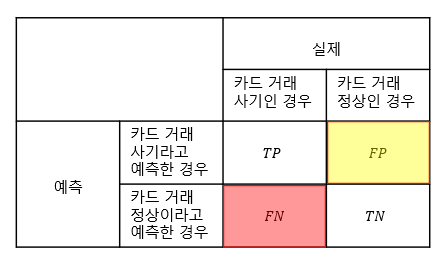
## 이에 대한 F1-score 는 1번과 2번의 비중을 50%씩 두어 반영한 지표이다.

# 
# 신용카드 거래 데이터 분석

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys

## 학습데이터와 검증데이터 그리고 테스트 데이터 불러오기
###### 데이터 다운로드 : https://dacon.io/competitions/official/235930/data

In [2]:
path = "./" # 데이터 저장 path 설정
train_data = pd.read_csv(path + "train.csv")
test_data = pd.read_csv(path + "test.csv")
val_data = pd.read_csv(path + "val.csv")

print("학습데이터 상위 5개 데이터 출력 : \n", train_data.head())

print("학습데이터 정보")
print(train_data.info())

학습데이터 상위 5개 데이터 출력 : 
    ID        V1        V2        V3        V4        V5        V6        V7  \
0   3 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
1   4 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
2   6 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
3   8 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
4   9 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
1  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
2  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
3 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
4  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   

        V26       V27

In [3]:
print("검증데이터 상위 5개 데이터 출력 : \n", val_data.head())

print("검증데이터 정보")
print(val_data.info())

검증데이터 상위 5개 데이터 출력 : 
    ID        V1        V2        V3        V4        V5        V6        V7  \
0  10 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   
1  22  0.962496  0.328461 -0.171479  2.109204  1.129566  1.696038  0.107712   
2  63  1.145524  0.575068  0.194008  2.598192 -0.092210 -1.044430  0.531588   
3  69  0.927060 -0.323684  0.387585  0.544474  0.246787  1.650358 -0.427576   
4  83 -3.005237  2.600138  1.483691 -2.418473  0.306326 -0.824575  2.065426   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.069539 -0.736727  ... -0.633753 -0.120794 -0.385050 -0.069733  0.094199   
1  0.521502 -1.191311  ...  0.402492 -0.048508 -1.371866  0.390814  0.199964   
2 -0.241888 -0.896287  ... -0.119703 -0.076510  0.691320  0.633984  0.048741   
3  0.615371  0.226278  ...  0.079359  0.096632 -0.992569  0.085096  0.377447   
4 -1.829347  4.009259  ... -0.181268 -0.163747  0.515821  0.136318  0.460054   

        V27       V28

In [4]:
print("시험데이터 상위 5개 데이터 출력 : \n", test_data.head())

print("시험데이터 정보")
print(test_data.info())

시험데이터 상위 5개 데이터 출력 : 
         ID        V1        V2        V3        V4        V5        V6  \
0  AAAA0x1 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1  AAAA0x2  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2  AAAA0x5 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
3  AAAA0x7  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
4  AAAA0xc  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   
3 -0.005159  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055   
4  0.470455  0.538247 -0.558895  ...  0.049924  0.238422  0.009130  0.996710   

        V25       V26       V27       V28       V29

## 데이터를 불러와서 해야하는 일은? : 데이터의 전반적인 생김새를 보는 것
### - 데이터가 오류없이 불러와지는가?-> O
### - 데이터의 크기(학습데이터 : 113,842개, 검증데이터 : 28,462개 등) -> O
### - 데이터 유형과 결측치 (30개의 특징들의 유형은 float64,  그리고 결측치는 non-null 로 없음) -> O
### - 특히 검증데이터셋에는 마지막에 카드 거래 사기 여부 (0 : 정상, 1: 사기) 가 있음. -> O

# 
# 신용카드 거래 데이터셋이 어떻게 생겼나 다양한 관점으로 들여다보자

## 각 데이터셋의 요약 통계량 보기(각 데이터셋 학습, 시험, 검증 데이터셋이 닮아있는가?)

### 데이터 요약 통계량
### (count : 데이터 개수, mean : 평균, std : 표준편차, min : 가장 작은 값, max : 가장 큰 값, 25%,50%,75% : 4분위수)

In [5]:
print("학습데이터 요약 통계량 : \n")
print(train_data.describe())

학습데이터 요약 통계량 : 

                  ID             V1             V2             V3  \
count  113842.000000  113842.000000  113842.000000  113842.000000   
mean   142025.527837       0.000197       0.001289       0.009717   
std     82248.545392       1.951060       1.651064       1.496916   
min         3.000000     -56.407510     -72.715728     -32.454198   
25%     70796.750000      -0.923479      -0.595602      -0.883877   
50%    141722.000000       0.012074       0.066390       0.183868   
75%    213359.500000       1.315373       0.801687       1.037120   
max    284803.000000       2.454930      21.467203       4.187811   

                  V4             V5             V6             V7  \
count  113842.000000  113842.000000  113842.000000  113842.000000   
mean       -0.004169       0.000475       0.005141       0.005769   
std         1.412633       1.367533       1.330583       1.204111   
min        -5.600607     -42.147898     -26.160506     -41.506796   
25%        -0.85

### 학습, 검증, 시험 데이터셋 각 집단들이 서로 닮아있나 보기 위함,
### 우리는 학습 데이터셋을 사용하여 모델을 학습하고 검증과 시험 데이터셋으로 평가해볼 것이므로
### 모델에 사용할 학습 데이터셋이 검증,시험 데이터셋 집단과 닮아있으면 학습에 신뢰성을 더해줄 것임
### 그러므로 각 요약 통계량에 대해 학습-검증, 학습-시험 의 차이값을 봄

In [6]:
for i in range(1,31):
    print("\n\n==============={} 번째 특징 =================".format(i))
    print("평균 차이값 :")
    print("학습 - 검증 : {}\n학습 - 시험 : {}".format(
    abs(train_data["V{}".format(i)].mean() - val_data["V{}".format(i)].mean()),
    abs(train_data["V{}".format(i)].mean() - test_data["V{}".format(i)].mean())
    ))
    
    print("\n표준편차 차이값 :")
    print("학습 - 검증 : {}\n학습 - 시험 : {}".format(
    abs(train_data["V{}".format(i)].std() - val_data["V{}".format(i)].std()),
    abs(train_data["V{}".format(i)].std() - test_data["V{}".format(i)].std())
    ))
    
    print("\n4분위수 25% 차이값 :")
    print("학습 - 검증 : {}\n학습 - 시험 : {}".format(
    abs(train_data["V{}".format(i)].quantile(0.25) - val_data["V{}".format(i)].quantile(0.25)),
    abs(train_data["V{}".format(i)].quantile(0.25) - test_data["V{}".format(i)].quantile(0.25))
    ))
    
    print("\n4분위수 50% 값 :")
    print("학습 - 검증 : {}\n학습 - 시험 : {}".format(
    abs(train_data["V{}".format(i)].quantile(0.5) - val_data["V{}".format(i)].quantile(0.5)),
    abs(train_data["V{}".format(i)].quantile(0.5) - test_data["V{}".format(i)].quantile(0.5))
    ))
    
    print("\n4분위수 75% 값 :")
    print("학습 - 검증 : {}\n학습 - 시험 : {}".format(
    abs(train_data["V{}".format(i)].quantile(0.75) - val_data["V{}".format(i)].quantile(0.75)),
    abs(train_data["V{}".format(i)].quantile(0.75) - test_data["V{}".format(i)].quantile(0.75))
    ))
    
    print("\n4분위수 100% 값 :")
    print("학습 - 검증 : {}\n학습 - 시험 : {}".format(
    abs(train_data["V{}".format(i)].quantile(1) - val_data["V{}".format(i)].quantile(1)),
    abs(train_data["V{}".format(i)].quantile(1) - test_data["V{}".format(i)].quantile(1))
    ))



===============1 번째 특징 =================
평균 차이값 :
학습 - 검증 : 0.0047694959566029075
학습 - 시험 : 0.0013469137347305914

표준편차 차이값 :
학습 - 검증 : 0.0204205340619934
학습 - 시험 : 0.01926405043935464

4분위수 25% 차이값 :
학습 - 검증 : 0.007953507426599726
학습 - 시험 : 0.0044801851996695286

4분위수 50% 값 :
학습 - 검증 : 0.01151267337598375
학습 - 시험 : 0.008635337878309052

4분위수 75% 값 :
학습 - 검증 : 0.00020508640475491724
학습 - 시험 : 0.0006426061184898746

4분위수 100% 값 :
학습 - 검증 : 0.0431608502440497
학습 - 시험 : 0.008425006215249997


===============2 번째 특징 =================
평균 차이값 :
학습 - 검증 : 0.0007253315900373127
학습 - 시험 : 0.002720659644218593

표준편차 차이값 :
학습 - 검증 : 0.04586524386259794
학습 - 시험 : 0.0095057849305209

4분위수 25% 차이값 :
학습 - 검증 : 0.0024506189263603373
학습 - 시험 : 0.0055816867608066145

4분위수 50% 값 :
학습 - 검증 : 0.009079799793520221
학습 - 시험 : 0.0030880917640761923

4분위수 75% 값 :
학습 - 검증 : 0.0017758629595677755
학습 - 시험 : 0.0035316956297873903

4분위수 100% 값 :
학습 - 검증 : 4.9697310924082
학습 - 시험 : 0.5905259962156997


============

학습 - 검증 : 0.0011173298107372553
학습 - 시험 : 0.006567536973258237

4분위수 100% 값 :
학습 - 검증 : 0.8768297565518299
학습 - 시험 : 0.85697165609594


===============20 번째 특징 =================
평균 차이값 :
학습 - 검증 : 0.002427549829285954
학습 - 시험 : 0.0005135860170315319

표준편차 차이값 :
학습 - 검증 : 0.033743170467564365
학습 - 시험 : 0.021553447761339162

4분위수 25% 차이값 :
학습 - 검증 : 0.0009411802776194966
학습 - 시험 : 0.0005765145160080143

4분위수 50% 값 :
학습 - 검증 : 0.00040959328805539874
학습 - 시험 : 0.0007086945718351029

4분위수 75% 값 :
학습 - 검증 : 0.0017896479340680227
학습 - 시험 : 0.00032512028835349205

4분위수 100% 값 :
학습 - 검증 : 2.103496597823799
학습 - 시험 : 13.183513458653998


===============21 번째 특징 =================
평균 차이값 :
학습 - 검증 : 0.0012558323455491333
학습 - 시험 : 0.002232376901995053

표준편차 차이값 :
학습 - 검증 : 0.02114219715337795
학습 - 시험 : 0.028833649391095895

4분위수 25% 차이값 :
학습 - 검증 : 0.0035135145861337203
학습 - 시험 : 0.0016776227718597603

4분위수 50% 값 :
학습 - 검증 : 0.0008512978372694456
학습 - 시험 : 0.001369376946989697

4분위수 75% 값 :
학습 - 검

### 30번째 특징의 경우 대체적인 요약 통계량 값의 차이들이 작은데 반해, 29번째 특징의 4분위수 100%값의 차이를 보면 꽤 큰 것을 볼 수 있음.

# 
## 각 데이터셋의 평균과 표준편차를 학습데이터셋과 검증, 시험 데이터셋 차이로  봐보기

In [7]:
for i in range(1,31):
    print("\n\n==============={} 번째 특징 =================".format(i))
    print("평균 차이값 :")
    print("학습 - 검증 : {}\n학습 - 시험 : {}".format(
    abs(train_data["V{}".format(i)].mean() - val_data["V{}".format(i)].mean()),
    abs(train_data["V{}".format(i)].mean() - test_data["V{}".format(i)].mean())
    ))
    
    print("\n표준편차 차이값 :")
    print("학습 - 검증 : {}\n학습 - 시험 : {}".format(
    abs(train_data["V{}".format(i)].std() - val_data["V{}".format(i)].std()),
    abs(train_data["V{}".format(i)].std() - test_data["V{}".format(i)].std())
    ))



===============1 번째 특징 =================
평균 차이값 :
학습 - 검증 : 0.0047694959566029075
학습 - 시험 : 0.0013469137347305914

표준편차 차이값 :
학습 - 검증 : 0.0204205340619934
학습 - 시험 : 0.01926405043935464


===============2 번째 특징 =================
평균 차이값 :
학습 - 검증 : 0.0007253315900373127
학습 - 시험 : 0.002720659644218593

표준편차 차이값 :
학습 - 검증 : 0.04586524386259794
학습 - 시험 : 0.0095057849305209


===============3 번째 특징 =================
평균 차이값 :
학습 - 검증 : 0.008303636760497073
학습 - 시험 : 0.017762677815484358

표준편차 차이값 :
학습 - 검증 : 0.002832966014173932
학습 - 시험 : 0.037820785873079465


===============4 번째 특징 =================
평균 차이값 :
학습 - 검증 : 0.006061734873538707
학습 - 시험 : 0.007121889391505218

표준편차 차이값 :
학습 - 검증 : 0.007494525472002689
학습 - 시험 : 0.007945890201873196


===============5 번째 특징 =================
평균 차이값 :
학습 - 검증 : 0.004443805556851793
학습 - 시험 : 6.177163856987619e-05

표준편차 차이값 :
학습 - 검증 : 0.03238632410087128
학습 - 시험 : 0.03156273791495878


===============6 번째 특징 =================
평균 차이값 :
학습 - 검증 : 0.

## 약간은 차이가 있으므로 정규화를 통해 각 데이터셋들의 평균과 표준편차를 같게 만들어줌으로써 학습의 신뢰성을 높임.
###### 
### 아래 그림처럼 정규화되지 않은 집단들은 서로 분포가 다르지만, 정규화된 두 집단의 분포를 보면 닮아있는 것을 볼 수 있음, 즉 이 의미는 학습데이터를 학습한 모델이 검증 혹은 테스트 데이터셋에 대해 예측할 때 신뢰성을 높일 수 있음.

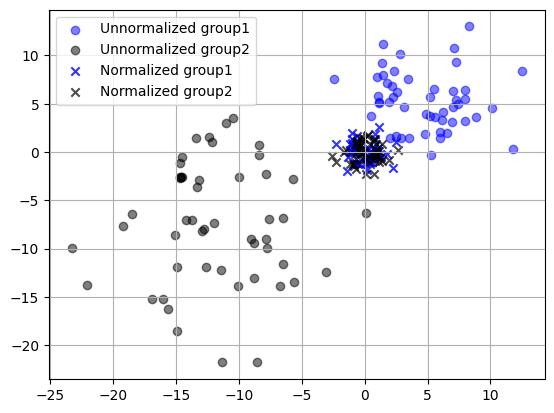

In [8]:
r1 = np.array([5., 5.]) + np.random.randn(50,2) * 3.
r2 = np.array([-12, -7]) + np.random.randn(50,2) * 5.

r1_n = (r1 - np.mean(r1, axis=0)) / np.std(r1, axis=0)
r2_n = (r2 - np.mean(r2, axis=0)) / np.std(r2, axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(r1[:,0], r1[:,1], label='Unnormalized group1', alpha=0.5, color='b')
ax.scatter(r2[:,0], r2[:,1], label='Unnormalized group2', alpha=0.5, color='k')
ax.scatter(r1_n[:,0], r1_n[:,1], label='Normalized group1', color='b', alpha=0.8, marker='x')
ax.scatter(r2_n[:,0], r2_n[:,1], label='Normalized group2', color='k', alpha=0.7, marker='x')
plt.legend()
plt.grid()
plt.show()

In [9]:
# 정규화 전에 검증데이터셋에 있는 레이블은 따로 저장,
label_data = np.array(val_data['Class'])
print(np.shape(label_data))

# 정규화진행
train_data = (train_data - train_data.mean(axis=0)) / train_data.std(axis=0)
val_data = (val_data - val_data.mean(axis=0)) / val_data.std(axis=0)
test_data = (test_data - test_data.mean(axis=0)) / test_data.std(axis=0)

(28462,)


/tmp/ipykernel_34017/1159920385.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data = (test_data - test_data.mean(axis=0)) / test_data.std(axis=0)
/tmp/ipykernel_34017/1159920385.py:8: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data = (test_data - test_data.mean(axis=0)) / test_data.std(axis=0)


### 정규화 진행 후, 학습 데이터셋과 검증, 테스트 데이터셋의 평균과 표준편차 차이를 아래와 같이 보면 차이가 거의 없음을 볼 수 있다.

In [10]:
for i in range(1,31):
    print("\n\n==============={} 번째 특징 =================".format(i))
    print("평균 차이값 :")
    print("학습 - 검증 : {}\n학습 - 시험 : {}".format(
    abs(train_data["V{}".format(i)].mean() - val_data["V{}".format(i)].mean()),
    abs(train_data["V{}".format(i)].mean() - test_data["V{}".format(i)].mean())
    ))
    
    print("\n표준편차 차이값 :")
    print("학습 - 검증 : {}\n학습 - 시험 : {}".format(
    abs(train_data["V{}".format(i)].std() - val_data["V{}".format(i)].std()),
    abs(train_data["V{}".format(i)].std() - test_data["V{}".format(i)].std())
    ))



===============1 번째 특징 =================
평균 차이값 :
학습 - 검증 : 2.1968330683483683e-17
학습 - 시험 : 3.132713450127613e-17

표준편차 차이값 :
학습 - 검증 : 1.1102230246251565e-16
학습 - 시험 : 1.1102230246251565e-16


===============2 번째 특징 =================
평균 차이값 :
학습 - 검증 : 5.991769600176087e-18
학습 - 시험 : 3.397614042847025e-18

표준편차 차이값 :
학습 - 검증 : 1.1102230246251565e-16
학습 - 시험 : 1.1102230246251565e-16


===============3 번째 특징 =================
평균 차이값 :
학습 - 검증 : 2.3966025800354724e-17
학습 - 시험 : 3.510256527758086e-17

표준편차 차이값 :
학습 - 검증 : 1.1102230246251565e-16
학습 - 시험 : 0.0


===============4 번째 특징 =================
평균 차이값 :
학습 - 검증 : 2.7962258114376505e-17
학습 - 시험 : 3.595093338116141e-17

표준편차 차이값 :
학습 - 검증 : 1.1102230246251565e-16
학습 - 시험 : 0.0


===============5 번째 특징 =================
평균 차이값 :
학습 - 검증 : 5.992243270333417e-18
학습 - 시험 : 3.9510056920813494e-17

표준편차 차이값 :
학습 - 검증 : 1.1102230246251565e-16
학습 - 시험 : 0.0


===============6 번째 특징 =================
평균 차이값 :
학습 - 검증 : 1.5977350533569815e-1

## 
## 이제 데이터가 어떻게 생겼나 다양한 관점으로 들여다보려 하는데, 어떻게 뭐 부터 들여다볼까?
## 먼저, 신용 카드 사기 유무 정보가 있는 검증데이터에 대해 시각화를 해봄으로써 정보를 캐내보자.
### 사기 거래 여부를 알고, 통계 정보를 사용할 수 있는 것은 검증 데이터셋이므로 시각화를 통해 사기 유무에 대해 분별할 수 있는 좋은 특징을 찾아보기 위함)

### 검증 데이터 안에 카드 거래 사기 데이터(1) 과 정상 데이터(0) 개수 :

In [11]:
l1 = np.sum(label_data == 1.)
l0 = np.sum(label_data == 0.)

print("카드 사기 데이터 수 : ", l1)
print("카드 정상 데이터 수 : ", l0)

카드 사기 데이터 수 :  30
카드 정상 데이터 수 :  28432


### 먼저 각 30개 특징에 각각에 대해 구분이 되어지는지 보자

(28462, 31)


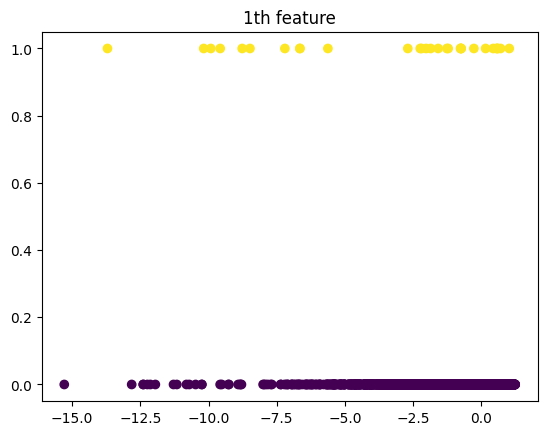

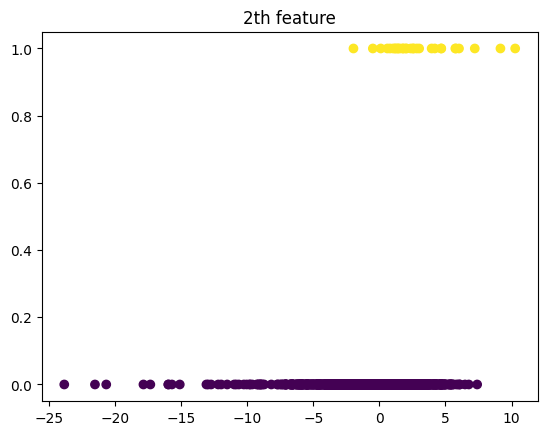

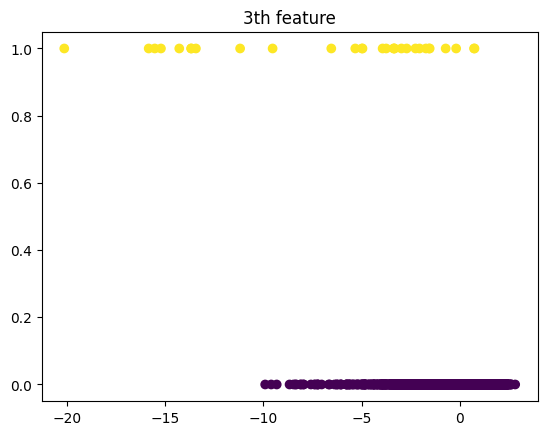

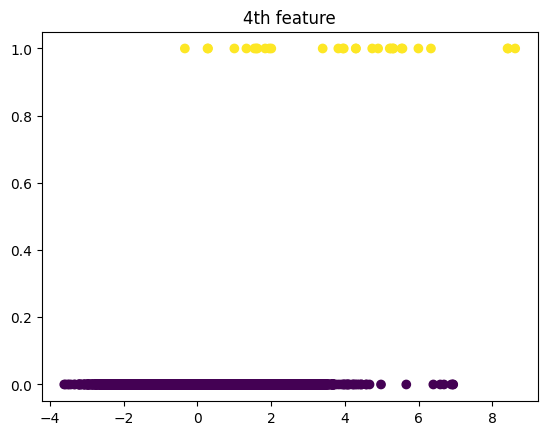

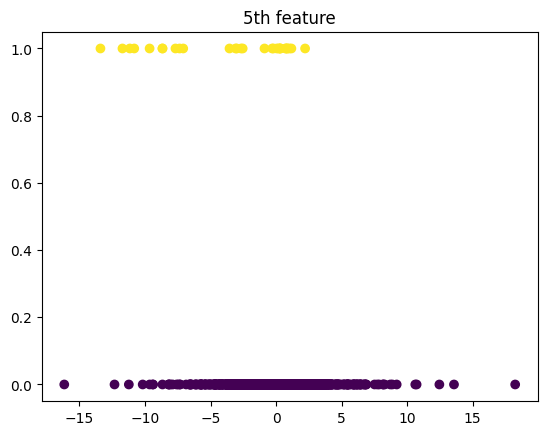

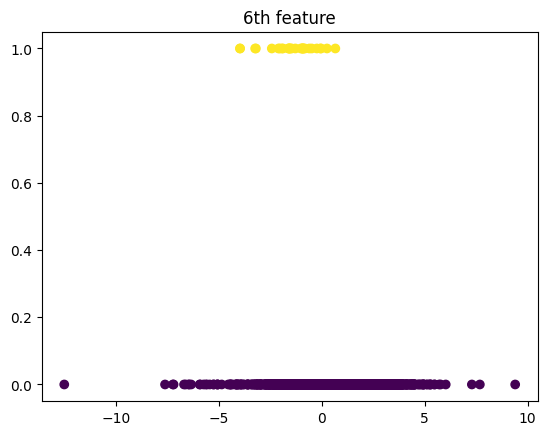

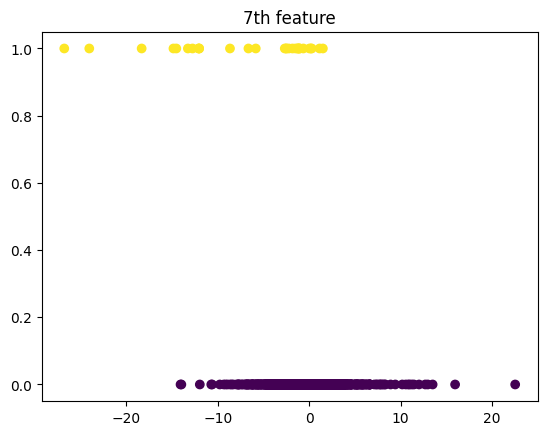

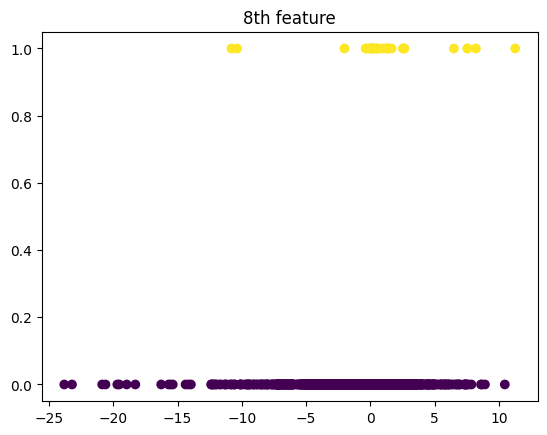

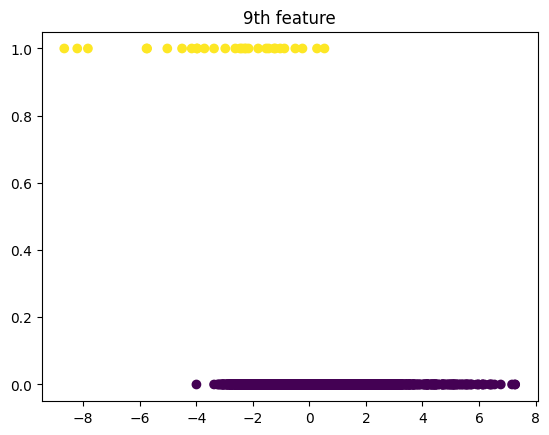

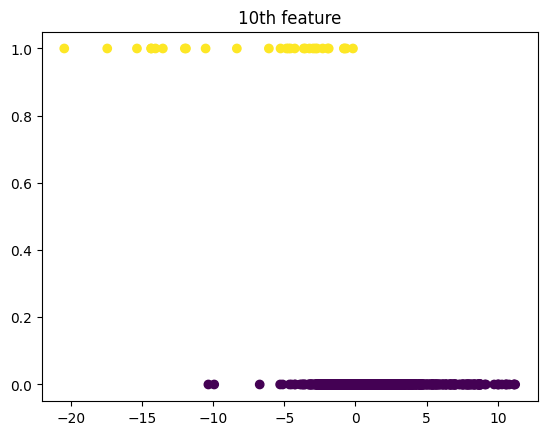

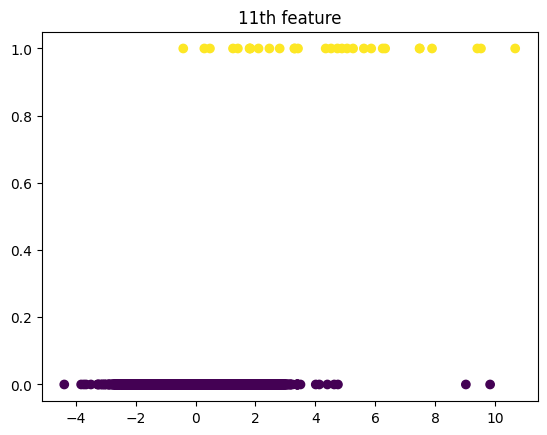

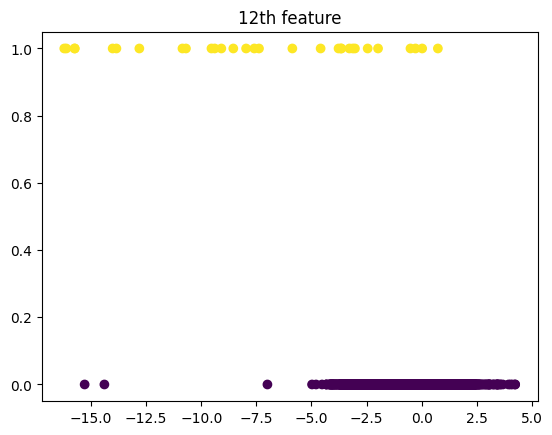

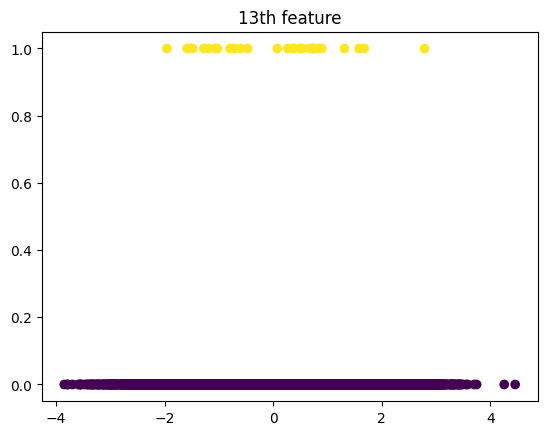

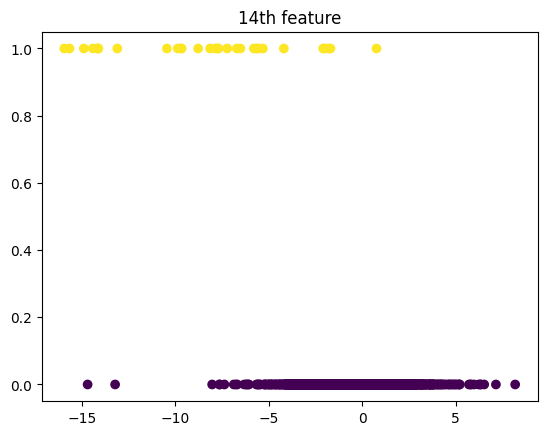

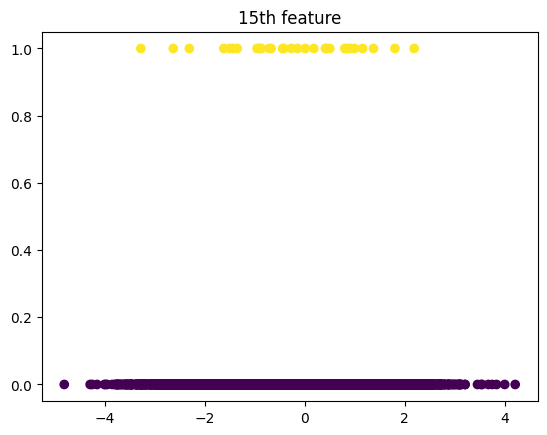

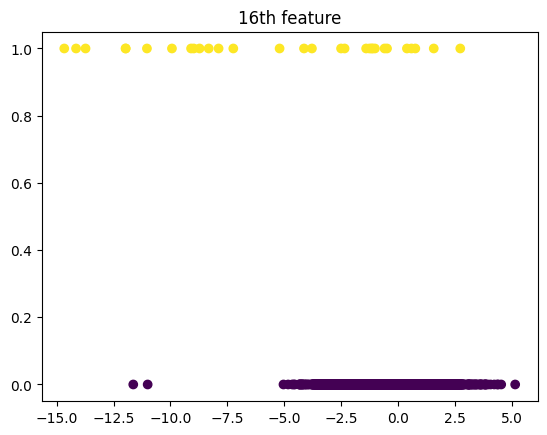

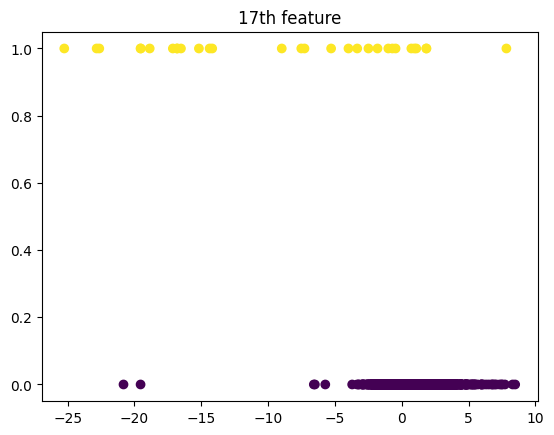

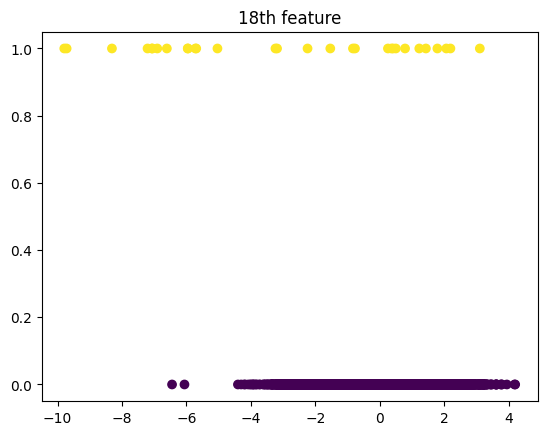

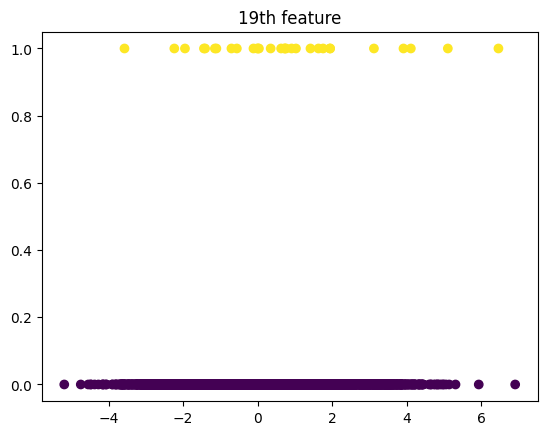

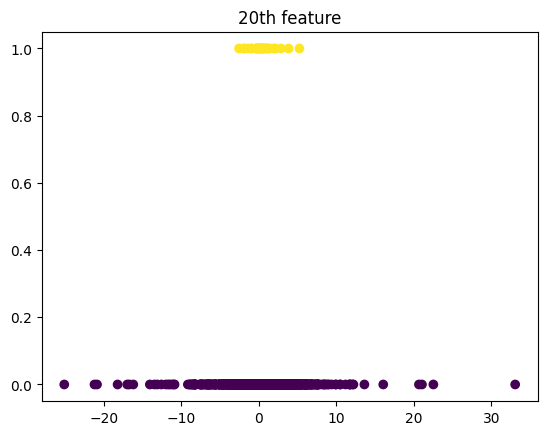

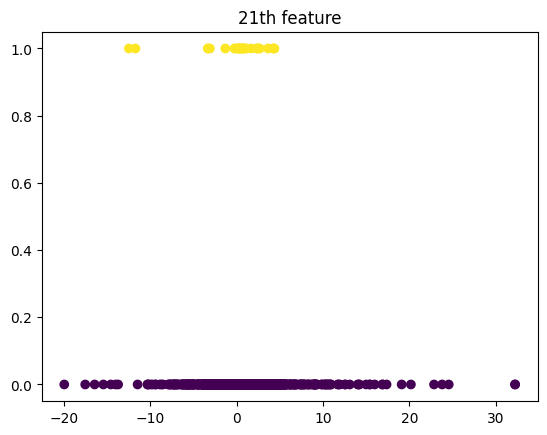

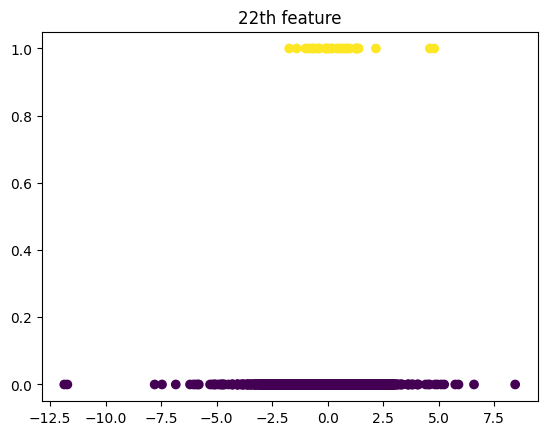

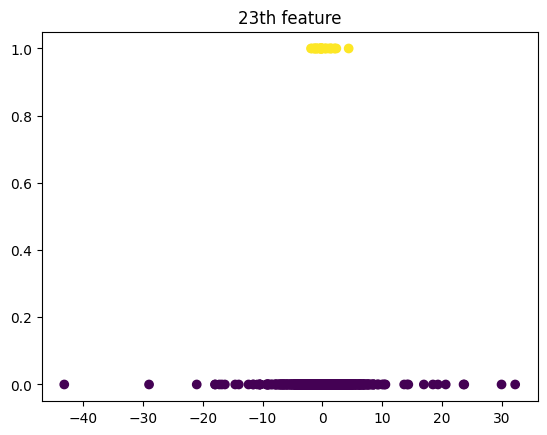

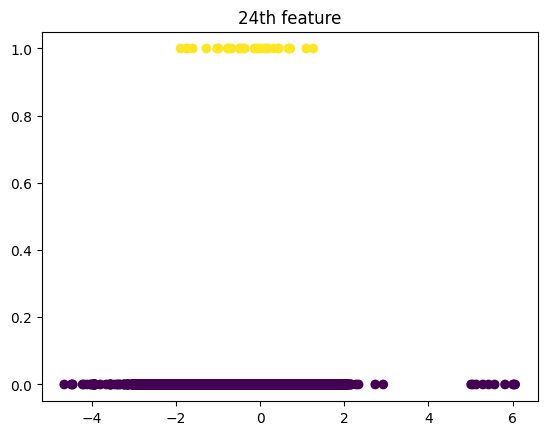

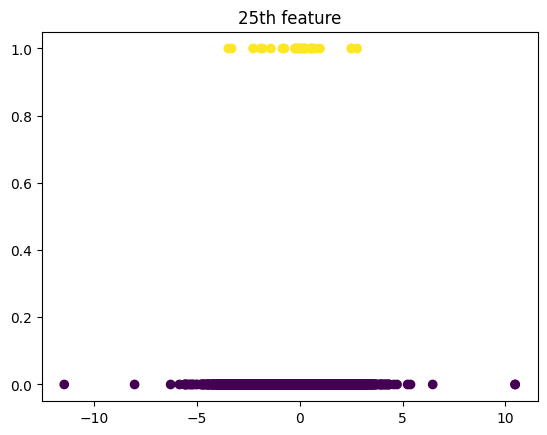

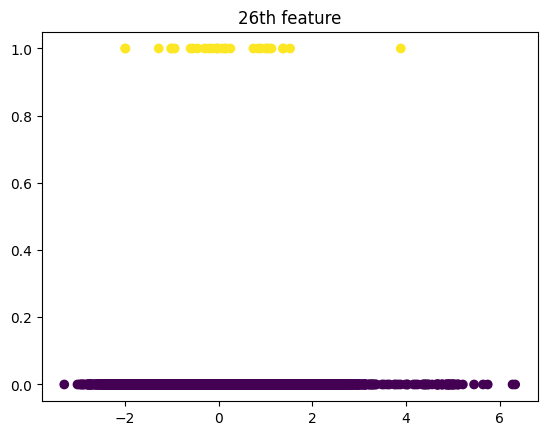

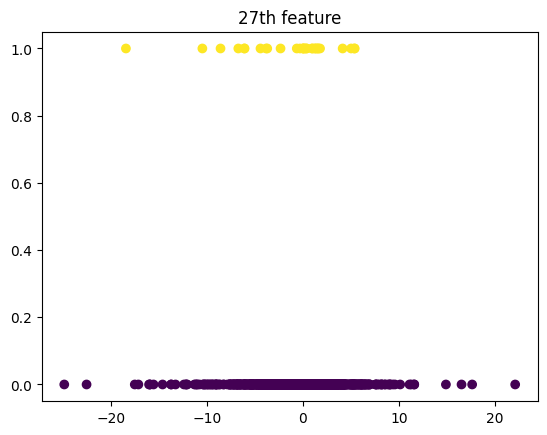

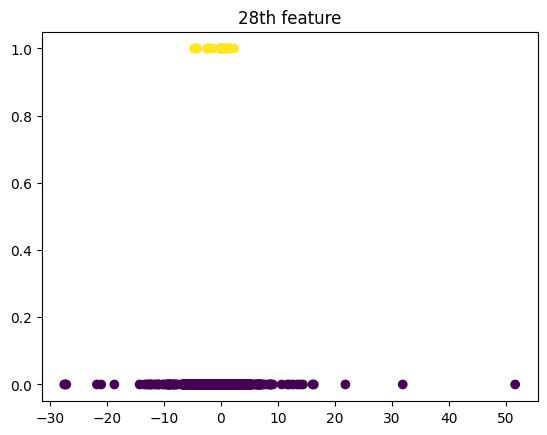

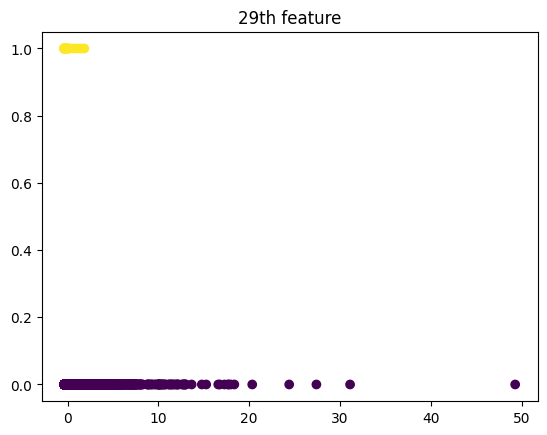

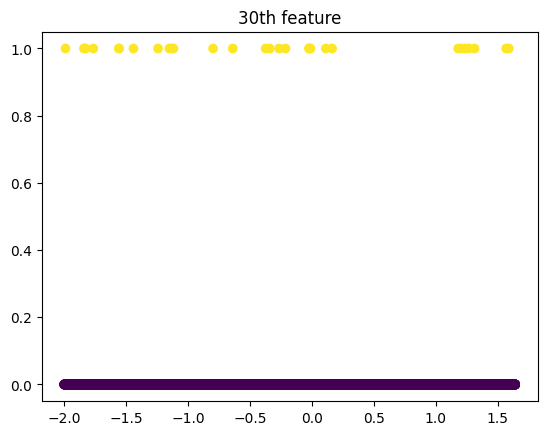

In [12]:
v_data = np.array(val_data)
v_data = v_data[:,1:]
print(np.shape(v_data))

for i in range(30):
    feat_data = np.reshape(v_data[:,i], (-1,1))
    feat_data = np.c_[feat_data, label_data]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(feat_data[:,0], feat_data[:,1], c=label_data)
    plt.title("{}th feature".format(i+1))
    plt.show()
    


## 각 2개 특징으로 시각화해보기

# 용량이 커서 코드만

In [ ]:
df =val_data.drop(['ID'], axis=1)
print(df.head())
print(np.shape(df))

df = pd.DataFrame(df)
marker = [ 'o', 'v']
sns_plot = sns.pairplot(df,  diag_kind='kde',
             hue='Class' ,markers=marker )      

sns_plot.figure.savefig("/home/oem/KYM/Kaggle_ex/Dataset/월간_신용카드_사기거래/output.png")

         V1        V2        V3        V4        V5        V6        V7  \
0 -0.177780  0.696225  0.695418 -0.159472  0.376984 -0.177240  0.554467   
1  0.495965  0.203369 -0.115281  1.499718  0.848996  1.326225  0.087678   
2  0.590767  0.356999  0.128418  1.847717 -0.066091 -0.794527  0.451478   
3  0.477610 -0.202902  0.257491  0.386141  0.187812  1.290875 -0.371745   
4 -1.559174  1.618569  0.988350 -1.722510  0.232405 -0.624389  1.767928   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.054838 -0.670878 -0.336124  ... -0.880262 -0.207939 -0.640612 -0.136691   
1  0.464397 -1.087605  0.670037  ...  0.556273 -0.085020 -2.276633  0.737438   
2 -0.227370 -0.817150  0.700977  ... -0.167640 -0.132635  1.143878  1.198980   
3  0.549458  0.211931 -0.205794  ...  0.108318  0.161785 -1.647804  0.157178   
4 -1.665887  3.679873  5.581820  ... -0.252988 -0.280978  0.852921  0.254399   

        V26       V27       V28       V29       V30     Class  
0  0

# 정교한 데이터 작업에 앞서서, 감을 잡아보기 위해 간단한 분류기를 만들어 결과를 제출해보자

### 특징 2개씩을 묶어 시각화한 그래프에서 12번 특징이 잘 구분되어 지는 것 같아 보임
### 12번 특징만 다시 카드 거래 사기 데이터와 정상 데이터로 구분지어 그려보면 다음과같음

In [ ]:
v = np.c_[val_data['V12'], label_data]
print(np.shape(v))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(v[:,0], v[:,1], c=label_data)
plt.grid()
plt.show()

### 대충 눈으로 어림 잡아 -5.2 정도 문턱값을 잡아 -5.2보다 작으면 카드 거래 사기, 크면 정상 데이터로 분류하는 기준을 잡아보자
### 그 뒤에, 시험 데이터셋에서 12번째 특징을 가지고 -5.2 기준으로 카드 거래 사기와 정상을 예측해보자

In [ ]:
boundary_value = -5.2

In [ ]:
idx0 = np.reshape(np.where(test_data['V12'] > -5.2), (-1))
idx1 = np.reshape(np.where(test_data['V12'] <= -5.2), (-1))

print(np.shape(idx0))
print(np.shape(idx1))

label_pred = np.zeros(len(test_data))
label_pred[idx1] = 1
label_pred = np.array(label_pred, dtype='int64')
print(label_pred)
print(np.where(label_pred == 1))

### 위와 같이 142,503개의 테스트 데이터들에 대해 사기인지 아닌지 예측한 결과를 DACON 리더보드 제출을 위해 엑셀 csv 파일로 변환하여 저장하자.

In [ ]:
save_path = '/home/oem/KYM/Kaggle_ex/Dataset/월간_신용카드_사기거래/pred1.csv'
np.savetxt(save_path, label_pred)

### 저장된 파일을 sample_submission 파일의 아이디와 항목을 적절히 붙혀 제출하면 결과는 다음과 같이 나온다.

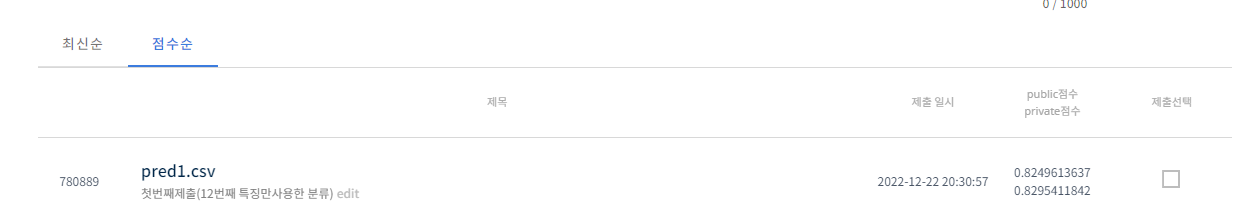

### 위 결과를 보면 테스트 데이터셋 30% 에 대해 82.5%의 정확도,
### 나머지 70% 에 대해 약 83%의 카드거래 사기 유무 정확도를 보이고있다.
### V12 특징 하나만으로도 카드거래 사기의 80%이상을 검출할 수 있다는 뜻이다.

# 
# 
# 
# 이제 좀 더 정교한 데이터 처리와 좋은 AI 모델을 사용해서 성능을 올려보자.

## 
## 좋은 AI 모델을 사용해서 학습시키기 전에, 입력으로써 들어가는 데이터의 성질이 나쁘면 모델의 예측이 불안정해진다. 그래서 먼저 AI 모델의 입력으로 들어갈 데이터가 어떤 성질을 가지는지 파악하는 것이 매우 중요하다.
## 
## 그렇다면 입력 데이터의 성질이 나쁘다는 것은 어떤 것인가?
## 모델의 성능에 방해가 되게 하는 입력 데이터의 성질들을 나쁘다고 할 수 있으며 
## 여러 나쁜 성질 중 중요한 하나는 입력 데이터간 함수관계를 가질 때이다.
### 입력 데이터간 함수관계를 가지는 것이 왜 나쁜 성질인가 이해하기 위해 입력 변수간 간단한 선형함수관계를 가지는 경우를 생각해보자.
### 입력 변수  $x_1 , x_2 $ 2개가 주어졌을 때 $y$ 를 예측하는 선형모델 $y = w_0 + w_1 x_1 + w_2x_2 + \epsilon $ 상황을 생각해보자.
### 그리고 $x_1 = 2x_2$ 인 입력 변수 간 선형관계를 가진다고 해보자.
### 1. $x_1 $은 $x_2 $에 2를 곱해서 표현할 수 있는데, 불필요하게 두 변수를 모두 사용하는 비효율적인 상황이 생김.
### 2. $y$를 예측하는데 $x_1 , x_2 $ 로 만들 수 있는 수 많은 조합이 생기므로 구한 답이 이 수 많은 조합 중에 하나를 찾게됨(구한 답의 분산이 크다는 의미임.) -> 신뢰성이 떨어짐 (이를 통계학에서는 다중공선성 문제 라고 칭함)


#### 용어 : 함수관계, 선형함수 관계, 상관관계

# 
## 이처럼 데이터 간의 함수관계를 포착하여 AI 모델 학습에 필요한 변수를 추리는 과정은 매우 중요하며 대표적으로 2가지 방법이 있음.
## 1. 변수(특징) 선택
## 2. 변수(특징) 추출

# 
## 먼저, 변수를 선택 혹은 추출하기 위해 입력 데이터의 생김새를 자세히 보자.

## 4가지 방법으로 학습 데이터의 생김새를 볼 것임
### 1. 산점도
### 2. 공분산행렬
### 3. VIF(분산 팽창 요인)
### 4. PCA(주성분 분석) 

In [ ]:
train_data = train_data.drop(['ID'], axis=1)
val_data = val_data.drop(['ID'], axis=1)
val_data = val_data.drop(['Class'], axis=1)
test_data = test_data.drop(['ID'], axis=1)

## 위에 검증 데이터에 대해 pairplot을 그린 것처럼 학습 데이터에 대해서도 그려봄으로써 시각적으로 각 변수 간 어떤 상관관계를 가지는지 확인해보자.

## 1. 산점도 (용량커서 코드만)

In [ ]:
df = train_data
print(df.head())
print(np.shape(df))

df = pd.DataFrame(df)
sns_plot = sns.pairplot(df,  diag_kind='kde')      

sns_plot.figure.savefig("/home/oem/KYM/Kaggle_ex/Dataset/월간_신용카드_사기거래/학습데이터_상관관계_산점도.png")

### 학습 데이터에 대한 산점도를 보면 눈에 띄는 선형함수관계를 가지는 변수들을 포착할 수 있다.

## 
## 2. 공분산행렬

## 수치적으로 상관관계를 보기 위해 학습 데이터의 변수들의 공분산 행렬을 구해보자.

In [ ]:
covar = np.corrcoef(train_data.T)
print(np.shape(covar))
print(np.round(covar, 3))

## 
## VIF(Variance Inflation Factor) 분산 팽창 요인  방법

### 변수들끼리의 선형 함수관계를 포착하는 방법으로 VIF 가 있음.
### 이 방법으로 특정 변수가 나머지 변수들의 선형 함수관계로 표현되는지 파악해볼 수 있다.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
dfX = pd.DataFrame(train_data)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
print(vif)

### VIF 가 크다는 것은 그 특정 변수가 다른 변수들의 선형 함수관계로 설명이 잘 된다는 의미이다. 이 의미는 그 특정 변수를 다른 변수들로 만들어낼 수 있으므로 굳이 사용하지 않아도 된다는 의미이다.
### 통계학자들이 제시하는 VIF 유의값은 5, 위험은 10정도로 그 숫자 이상시 변수를 제거함으로써 변수간 선형함수관계를 없앨 수있다.
### 현재 보면 V2 와 V29 변수의 VIF 값이 큰 것을 볼 수 있다.

## 
## 4. PCA(Principal Component Analysis) 주성분분석

### 구해놓은 공분산행렬이 길어 해석하기 힘들고 상관관계만 나타나 제한된 경우, 추려서 볼 수 있는 다른 방법인 PCA가 있음

In [ ]:
cov = np.dot(train_data.T, train_data) / len(train_data)
print(np.shape(cov))

D, P = np.linalg.eig(cov)
print(np.shape(P))
print(np.shape(D))

print("학습 데이터의 공분산행렬을 고유값 분해를 통해 본 고유값 :\n" ,np.sort(D))

### 해석해보면 고유값이 0에 가까운 값이 포착된다는 것은 각 변수들의 선형함수 관계로 만들어진다는 의미이며 불필요한 변수가 있다는 의미임, 여기서는 0.04정도로 0에 가까운 값이 있는 것을 볼 수 있음. 

# 
# 
## 4가지 방법으로 학습데이터의 성질을 보았으며, 그 결과 불필요한 변수가 존재하며
## 변수를 선택 혹은 추출해야 한다.
## 그 중 산점도를 기반으로 상관관계를 보이는 변수를 선택하여 제거하도록 하자.

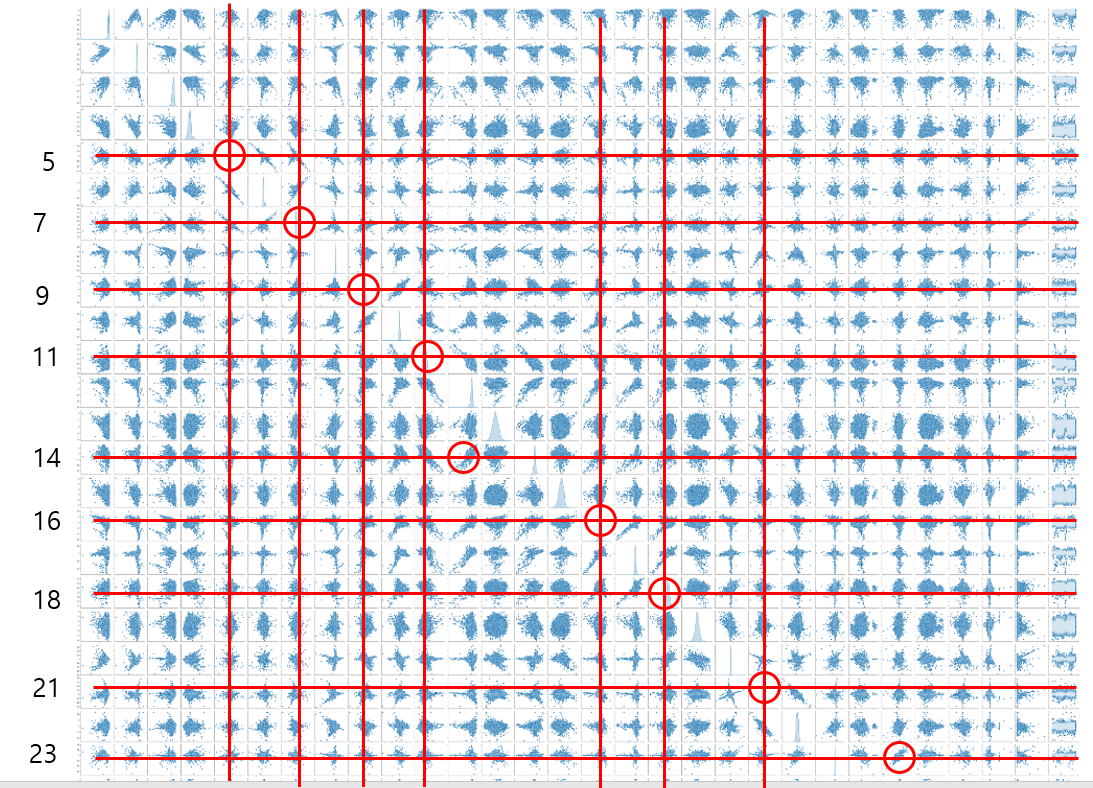

### 그 중에서 산점도를 보면 몇몇 변수들끼리의 상관관계가 나타난다는 것을 볼 수 있고 
### 상관관계가 강한 변수 V5, 7, 9, 11, 14, 16, 18, 21, 23 을 선택하여 제거하자.

In [ ]:
train_data = train_data.drop(['V5'], axis=1)
train_data = train_data.drop(['V7'], axis=1)
train_data = train_data.drop(['V9'], axis=1)
train_data = train_data.drop(['V11'], axis=1)
train_data = train_data.drop(['V14'], axis=1)
train_data = train_data.drop(['V16'], axis=1)
train_data = train_data.drop(['V18'], axis=1)
train_data = train_data.drop(['V21'], axis=1)
train_data = train_data.drop(['V23'], axis=1)
print(train_data.head())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
dfX = pd.DataFrame(train_data)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
print(vif)

### 상관관계가 강하게 나타나는 몇몇 변수들을 제거한 뒤, VIF 결과 값들이 전체적으로 낮아진 것을 확인할 수 있다.

# 
## 데이터의 차원이 높아질수록 등간격의 데이터로 공간을 채우려고할 때, 필요한 데이터의 수가 지수적으로 늘어나는 문제점을 차원의 저주라고 한다.
## 현재 선택된 변수는 21차원으로 조금이라도 작은 차원으로 줄여서 다루는 것이 안전하다.

## 차원을 줄이려는 방법은 선형, 비선형 차원 축소 방법이 있고, 원본 차원의 데이터의 정보를 최대한 유지하면서 차원을 줄이는 좋은 방법 중 하나가 오토인코더 방법이 있다.
## 이에 21개의 변수들을 오토인코더 방법을 통해 15개의 잠재변수들로 표현해보자.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import tensorflow.compat.v1 as tf1
# import tensorflow as tf2
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
config = tf1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.03
session = tf1.Session(config=config)

In [ ]:
class Encoder(layers.Layer):
    def __init__(self, latent_dim=2, name="encoder", **kwargs):
        super(Encoder, self).__init__()
        self.d1 = layers.Dense(256)
        self.bn1 = layers.BatchNormalization()
        self.a1 = layers.LeakyReLU()
        self.d2 = layers.Dense(256)
        self.bn2 = layers.BatchNormalization()
        self.a2 = layers.LeakyReLU()

        self.d3 = layers.Dense(latent_dim, name="z")

    def call(self, inputs, **kwargs):
        x = tf.cast(inputs, dtype=tf.float32)
        x = self.d1(x)
        x = self.bn1(x)
        x = self.a1(x)
        x = self.d2(x)
        x = self.bn2(x)
        x = self.a2(x)
        
        x = self.d3(x)
        return x

In [ ]:
class Decoder(layers.Layer):
    def __init__(self, original_dim, name="decoder", **kwargs):
        super(Decoder, self).__init__()
        self.d1 = layers.Dense(256)
        self.bn1 = layers.BatchNormalization()
        self.a1 = layers.LeakyReLU()
        self.d2 = layers.Dense(256)
        self.bn2 = layers.BatchNormalization()
        self.a2 = layers.LeakyReLU()
        
        self.d3 = layers.Dense(original_dim)

    def call(self, inputs, **kwargs):
        x = tf.cast(inputs, dtype=tf.float32)
        x = self.d1(x)
        x = self.bn1(x)
        x = self.a1(x)
        x = self.d2(x)
        x = self.bn2(x)
        x = self.a2(x)
        
        x = self.d3(x)

        return x

In [ ]:
class AutoEncoder(keras.Model):
    """Combines the encoder and decoder into an end-to-end model for training."""

    def __init__(
        self,
        original_dim,
        latent_dim=2,
        name="autoencoder",
        **kwargs
    ):
        super(AutoEncoder, self).__init__(name=name, **kwargs)
        self.original_dim = original_dim
        self.encoder = Encoder(latent_dim=latent_dim)
        self.decoder = Decoder(original_dim)

    def call(self, inputs):
        z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        return reconstructed

In [ ]:
mse = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

original_dim=21
latent_dim=15
epochs= 501
ae15 = AutoEncoder(original_dim=original_dim, latent_dim=latent_dim)

dataset = tf.data.Dataset.from_tensor_slices(dfX)
dataset = dataset.shuffle(buffer_size=120000).batch(64)

# Iterate over epochs.
for epoch in range(epochs):

    # Iterate over the batches of the dataset.
    for idx, x_batch_train in enumerate(dataset):
        with tf.GradientTape() as tape:
            reconstructed = ae15(x_batch_train)

            reconstruction_loss = mse(x_batch_train, reconstructed)

        grads = tape.gradient(reconstruction_loss, ae15.trainable_weights)

        optimizer.apply_gradients(zip(grads, ae15.trainable_weights))

    if epoch % 50 == 0:
        print("{} th epochs Recons loss : {}".format(epoch, reconstruction_loss))

save_path = "/home/oem/KYM/Kaggle_ex/Experiment/신용카드_사기거래/savemodel/dim15/m2/"
os.makedirs(save_path, exist_ok=True)
ae15.save_weights(save_path)

In [ ]:
save_path = "/home/oem/KYM/Kaggle_ex/Experiment/신용카드_사기거래/savemodel/dim15/m2/"
original_dim=21
latent_dim=15
ae15 = AutoEncoder(original_dim=original_dim, latent_dim=latent_dim)
ae15.load_weights(save_path)

In [ ]:
mse = tf.keras.losses.MeanSquaredError()
reconstructed = ae15(train_data)
reconstruction_loss = mse(train_data , reconstructed)
print("21개의 변수를 가지는 113,842개의 학습데이터에 대해 15개의 변수로 비선형축소하였을 때 손실함수 값(압축) :",
      np.array(reconstruction_loss))

## 21개의 변수를 비선형차원축소하여 15개의 잠재변수로 변환하였고, 그때 손실함수 값은 0.005정도로 나왔다. 일단은 21차원의 정보를 최대한 유지하면서 15차원으로 줄인 것으로 가정해보자.

## 변환된 잠재변수에 대해 산점도를 다시 그려보자. (용량)

In [ ]:
train_latent = ae15.encoder(train_data)

df = pd.DataFrame(train_latent)
sns_plot = sns.pairplot(df,  diag_kind='kde')

sns_plot.figure.savefig("/home/oem/KYM/Kaggle_ex/Dataset/월간_신용카드_사기거래/비선형축소된_학습데이터_산점도.png")

### 변환된 15개의 잠재변수들의 산점도를 보면 눈에 띄는 함수관계는 찾아지지 않음

## 검증데이터셋도 학습된 오토인코더에 넣어 15개의 잠재변수를 추려 산점도를 그려봄

In [ ]:
val_data = val_data.drop(['V5'], axis=1)
val_data = val_data.drop(['V7'], axis=1)
val_data = val_data.drop(['V9'], axis=1)
val_data = val_data.drop(['V11'], axis=1)
val_data = val_data.drop(['V14'], axis=1)
val_data = val_data.drop(['V16'], axis=1)
val_data = val_data.drop(['V18'], axis=1)
val_data = val_data.drop(['V21'], axis=1)
val_data = val_data.drop(['V23'], axis=1)

In [ ]:
val_data_latent = ae15.encoder(val_data)
print(np.shape(val_data_latent))
print(type(val_data_latent))

In [ ]:
df = np.c_[val_data_latent, label_data]
df = pd.DataFrame(df)
print(df.head())

In [ ]:
marker = [ 'o', 'v']
sns_plot = sns.pairplot(df,  diag_kind='kde',
             hue=15 ,markers=marker )      

sns_plot.figure.savefig("/home/oem/KYM/Kaggle_ex/Dataset/월간_신용카드_사기거래/검증데이터_비선형차원축소_시각화.png")

## 
## 학습데이터의 15개 잠재변수에 대해 VIF 를 통해 선형함수 관계를 가지는지 체크해보자.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
dfX = pd.DataFrame(train_latent)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
print(vif)

### 21개의 선택된 변수의 VIF는 2.46 정도의 값도 나왔지만 15개의 잠재변수로 변환되면서 선형함수관계가 많이 감소된 것을 볼 수 있다.

# 여기까지 학습데이터를 가지고 변수 선택, 추출 방법을 사용하여 15개의 잠재변수로 추려보았다.
# 
# 이제 추출된 15개의 잠재변수를 가지고 카드거래 사기 유무를 판별해보려면
## - 학습데이터의 15개의 잠재변수를 가지고 카드거래 사기 유무를 어떻게 판별할 것인가?
## 먼저 학습데이터에 대해 카드거래 사기 유무 레이블을 어떻게 줄 수 있을까?

# 
# 첫 번째 가설 : 학습데이터의 이상치(outlier)가 카드거래 사기일 것이다.
## 학습데이터의 분포에서 이상치로 선정된 값들이 카드거래 사기일 것으로 가정하고 이상치 탐색 알고리즘을 사용하여 카드거래 사기유무 레이블을 부여해보자.

In [ ]:
train_latent = ae15.encoder(train_data)

print(type(train_latent))
print(type(val_data_latent))
train_latent = np.array(train_latent)
val_data_latent = np.array(val_data_latent)
print(type(train_latent))
print(type(val_data_latent))
print(np.shape(train_latent))
print(np.shape(val_data_latent))

## 학습데이터와 검증데이터의 분포, 다시 정규화가 필요함

In [ ]:
num1 = int(input("첫 번째 변수 선택 : "))
num2 = int(input("두 번째 변수 선택 : "))

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(121)
ax.scatter(val_data_latent[:,num1-1], val_data_latent[:,num2-1], c=label_data)
plt.xlabel("Z{}".format(num1))
plt.ylabel("Z{}".format(num2))
plt.title("Validation data distribution")
plt.grid()

ax = fig.add_subplot(122)
plt.title("Train data distribution")
ax.scatter(train_latent[:,num1-1], train_latent[:,num2-1])
plt.xlabel("Z{}".format(num1))
plt.ylabel("Z{}".format(num2))
plt.grid()
plt.show()

In [ ]:
# 정규화진행
train_latent = (train_latent - np.mean(train_latent, axis=0)) / np.std(train_latent, axis=0)
val_data_latent = (val_data_latent - np.mean(val_data_latent, axis=0)) / np.std(val_data_latent, axis=0)

## 정규화된 추출된 변수들

In [ ]:
print(abs(np.round(np.mean(val_data_latent, axis=0), 3)))
print(abs(np.round(np.std(val_data_latent, axis=0), 3)))
print(abs(np.round(np.mean(train_latent, axis=0), 3)))
print(abs(np.round(np.std(train_latent, axis=0), 3)))

In [ ]:
num1 = int(input("첫 번째 변수 선택 : "))
num2 = int(input("두 번째 변수 선택 : "))

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(121)
ax.scatter(val_data_latent[:,num1-1], val_data_latent[:,num2-1], c=label_data)
plt.xlabel("Z{}".format(num1))
plt.ylabel("Z{}".format(num2))
plt.title("Validation data distribution")
plt.grid()

ax = fig.add_subplot(122)
plt.title("Train data distribution")
ax.scatter(train_latent[:,num1-1], train_latent[:,num2-1])
plt.xlabel("Z{}".format(num1))
plt.ylabel("Z{}".format(num2))
plt.grid()
plt.show()

##### 
## 이상치 탐색 알고리즘 중에
## 1. LOF(Local Outlier Factor)
## 2. HBOS(Histogram-Based Outlier Score)
## 3. Isolation forest
## 위 3개 알고리즘을 사용하여 이상치를 추출해보고 카드 거래 사기 데이터로 레이블링 해보자.

In [ ]:
from pyod.models.lof import LOF
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest

In [ ]:
# setting parameters
random_state = np.random.RandomState(1025)
outliers_fraction = 0.0004 # 비율 검증데이터셋 정답비율 반영 과 여러 실험

lof = LOF(contamination=outliers_fraction)
hbos = HBOS(contamination=outliers_fraction)
isol = IForest(contamination=outliers_fraction,random_state=random_state)

In [ ]:
print(np.shape(train_latent))

In [ ]:
# model fitting
lof.fit(train_latent)
hbos.fit(train_latent)
isol.fit(train_latent)

In [ ]:
print("LOF 이상치 개수 : ", np.sum(lof.labels_ == 1))
print("HBOS 이상치 개수 : ", np.sum(hbos.labels_ == 1))
print("Isolation 이상치 개수 : ", np.sum(isol.labels_ == 1))

## 학습된 이상치 탐색 알고리즘에 검증 데이터셋을 적용하여 이상치를 예측해보자

In [ ]:
print(np.shape(val_data_latent))

In [ ]:
pred_v1 = lof.predict(val_data_latent)
pred_v2 = hbos.predict(val_data_latent)
pred_v3 = isol.predict(val_data_latent)

In [ ]:
total_pred = np.c_[pred_v1, pred_v2, pred_v3]
print(np.shape(total_pred))
total_pred = np.sum(total_pred, axis=1)
print(np.shape(total_pred))
idx = np.where(total_pred >= 2)
total_pred[idx] = 1
print("검증 데이터셋의 이상치값 예측 개수 : ",np.sum(total_pred == 1))
print("검증 데이터셋의 이상치값 개수 : ",np.sum(label_data == 1))

In [ ]:
c = np.sum(total_pred == label_data)
print(c / len(total_pred))

## 이상치 탐색 알고리즘을 통해 예측된 검증데이터셋의 카드사기거래라고 말한 것과 실제 카드거래 사기에 대한 비교 그림

In [ ]:
num1 = int(input("첫 번째 변수 선택 : "))
num2 = int(input("두 번째 변수 선택 : "))

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(121)
ax.scatter(val_data_latent[:,num1-1], val_data_latent[:,num2-1], c=label_data)
plt.xlabel("Z{}".format(num1))
plt.ylabel("Z{}".format(num2))
plt.title("Validation data distribution")
plt.grid()

ax = fig.add_subplot(122)
plt.title("Predicted validation data distribution with outlier detection")
ax.scatter(val_data_latent[:,num1-1], val_data_latent[:,num2-1], c=total_pred)
plt.xlabel("Z{}".format(num1))
plt.ylabel("Z{}".format(num2))
plt.grid()
plt.show()

## 위 부분을 보게되면 이상치 탐색 알고리즘을 통해 카드거래 사기가 적절해보이지 않는 것을 볼 수 있다.
## 카드 거래 사기 상황을 상상해보면
### 1. 평소 적은 금액을 결제하던 카드를 훔친 범인이 매우 큰 금액을 결제하는 경우 -> 이는 이상치에서 잡힐 것으로 기대
### 2. 지능적인 범인이 평소 결제 금액과 비슷한 금액으로 결제하는 경우 -> 이상치 탐색에서 캐치가 되길 기대하기 어려워 보임.

## 다시 돌아와
### 1. 이상치가 카드 거래 사기의 모든 것을 설명할 수 없거나
### 2. 모든 것을 설명할 수 있다면 이상치 알고리즘의 세세한 하이퍼 파라미터 조율을 통해 찾아내야한다.

## 
### 일단 테스트 데이터셋에 적용해서 성능을 체크해보자

# 테스트 데이터 해보기

In [ ]:
print(test_data)

In [ ]:
test_data = test_data.drop(['V5'], axis=1)
test_data = test_data.drop(['V7'], axis=1)
test_data = test_data.drop(['V9'], axis=1)
test_data = test_data.drop(['V11'], axis=1)
test_data = test_data.drop(['V14'], axis=1)
test_data = test_data.drop(['V16'], axis=1)
test_data = test_data.drop(['V18'], axis=1)
test_data = test_data.drop(['V21'], axis=1)
test_data = test_data.drop(['V23'], axis=1)

test_latent = ae15.encoder(test_data)
test_latent = np.array(test_latent)
test_latent = (test_latent - np.mean(test_latent, axis=0)) / np.std(test_latent, axis=0)

pred_v1 = lof.predict(test_latent)
pred_v2 = hbos.predict(test_latent)
pred_v3 = isol.predict(test_latent)

total_pred = np.c_[pred_v1, pred_v2, pred_v3]
print(np.shape(total_pred))
total_pred = np.sum(total_pred, axis=1)
print(np.shape(total_pred))
idx = np.where(total_pred >= 2)
total_pred[idx] = 1
print(np.sum(total_pred == 1))

### 테스트 데이터셋에 대해서는 1,352 건이 신용카드 사기거래라고 예측하였으며 아래와 같이 55% 정도의 정확성이 나왔다.

In [ ]:
save_path = '/home/oem/KYM/Kaggle_ex/Dataset/월간_신용카드_사기거래/test_pred3.csv'
np.savetxt(save_path, total_pred)

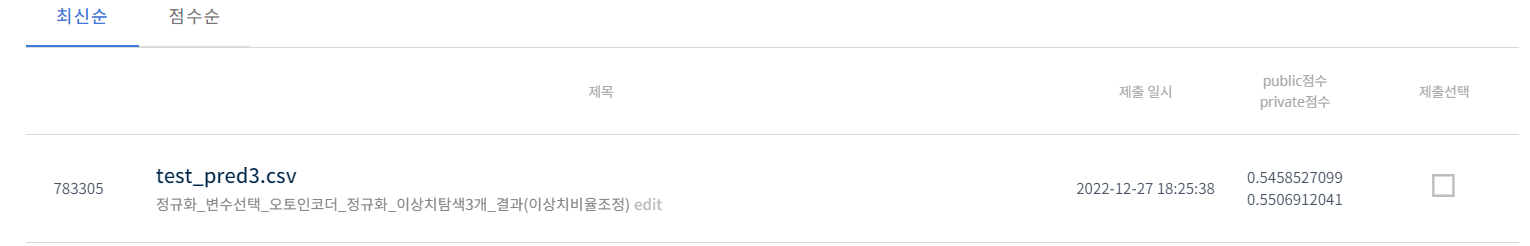

# 
# 어떻게 해야 카드거래 사기 유무를 판별할 수 있을까?